# Step 1 - Data Import

In [63]:
import pandas as pd
cryptocurrency_df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/Recurrent Neural Networks/Cryptocurrencies Pricing Prediction using LSTM.csv')
cryptocurrency_df['Datetime'] = pd.to_datetime(cryptocurrency_df['Datetime'])
cryptocurrency_raw_df = cryptocurrency_df.copy()
print('Shape:', cryptocurrency_df.shape)
cryptocurrency_df.head()

Shape: (44640, 20)


Datetime           BTC          ETH       XRP       ADA  \
0 2021-07-01 00:00:00  34993.994267  2271.039330  0.704025  1.382831   
1 2021-07-01 00:01:00  34991.266464  2268.116536  0.700075  1.379658   
2 2021-07-01 00:02:00  34952.450112  2266.642162  0.700705  1.377706   
3 2021-07-01 00:03:00  34961.649826  2263.985129  0.699815  1.377332   
4 2021-07-01 00:04:00  34976.586395  2266.235855  0.701239  1.379306   

       USDT      DOGE       XLM        DOT        UNI       LINK      USDC  \
0  1.000329  0.253676  0.283083  16.376717  19.244795  19.494431  1.000021   
1  1.000335  0.253341  0.281040  16.317789  19.121242  19.410625  1.000034   
2  1.000272  0.252944  0.281025  16.274206  19.095415  19.379428  1.000061   
3  1.000335  0.252913  0.280712  16.283652  19.126605  19.371209  1.000110   
4  1.000278  0.253070  0.280705  16.297902  19.148409  19.383866  0.999984   

          BCH         LTC       GRT        ETC        FIL        AAVE  \
0  525.821572  144.052565  0.590845  57.485801  60.376036  250.743422   
1  524.332870  143.859204  0.588987  57.032506  60.080642  249.715773   
2  522.938129  143.616612  0.587765  56.879247  59.916865  249.591864   
3  523.220566  143.609822  0.587951  56.946175  59.938719  249.911473   
4  523.783413  143.578780  0.588758  56.800281  59.954795  250.234278   

       ALGO       EOS  
0  0.881776  4.137482  
1  0.880951  4.117643  
2  0.879877  4.110904  
3  0.880220  4.111769  
4  0.880768  4.114448

# the dataset has all the values of this 20 Cryptocurrencies by minute during the month of July, 07. 

In [31]:
cryptocurrency_df.tail(5)

Datetime           BTC          ETH       XRP       ADA  \
44635 2021-07-31 23:55:00  41644.809117  2536.220443  0.747478  1.322895   
44636 2021-07-31 23:56:00  41703.605552  2538.959553  0.749158  1.323609   
44637 2021-07-31 23:57:00  41698.926409  2539.081856  0.748704  1.324239   
44638 2021-07-31 23:58:00  41593.370275  2534.914255  0.747466  1.321593   
44639 2021-07-31 23:59:00  41449.876911  2530.913460  0.745968  1.319183   

           USDT      DOGE       XLM        DOT        UNI       LINK  \
44635  0.999989  0.208294  0.285944  16.847845  21.811036  22.742082   
44636  0.999968  0.208547  0.285545  16.893244  21.840423  22.790300   
44637  0.999970  0.208509  0.285948  16.888088  21.842851  22.807892   
44638  0.999960  0.208181  0.285358  16.831071  21.798653  22.741340   
44639  1.000034  0.207662  0.284392  16.779653  21.768702  22.705362   

           USDC         BCH         LTC       GRT        ETC        FIL  \
44635  0.999395  547.457057  144.946544  0.627893  51.332568  52.205578   
44636  0.999374  548.332680  145.056291  0.628447  51.423681  52.253974   
44637  0.999369  547.938025  145.044898  0.628738  51.481845  52.245314   
44638  0.999431  547.171847  144.787101  0.626283  51.356457  52.174541   
44639  0.999494  545.949540  144.317251  0.625446  51.334107  52.018768   

             AAVE      ALGO       EOS  
44635  331.018637  0.841576  4.087844  
44636  331.152599  0.842287  4.091723  
44637  331.335501  0.841858  4.093852  
44638  330.777875  0.840944  4.085547  
44639  331.115376  0.839058  4.066565

# the coindesk 20

In [32]:
coindesk20_list = list(cryptocurrency_df.columns)[1:]
print(coindesk20_list)
print(len(coindesk20_list))

['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']
19


# Step 2 - Data Visualization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(cryptocurrency_df.iloc[:, 1:])
cryptocurrency_df.iloc[:, 1:] = sc.transform(cryptocurrency_df.iloc[:, 1:])

In [37]:
cryptocurrency_df.head()

Datetime       BTC       ETH       XRP       ADA      USDT  \
0 2021-07-01 00:00:00  0.260957  0.840430  1.383791  1.070294  0.382417   
1 2021-07-01 00:01:00  0.260017  0.823908  1.306542  1.036841  0.406563   
2 2021-07-01 00:02:00  0.246645  0.815574  1.318867  1.016264  0.175671   
3 2021-07-01 00:03:00  0.249815  0.800555  1.301462  1.012321  0.406485   
4 2021-07-01 00:04:00  0.254960  0.813278  1.329311  1.033136  0.196723   

       DOGE       XLM       DOT       UNI      LINK      USDC       BCH  \
0  2.057621  1.749280  1.409473  0.247946  0.972763 -0.327461  1.259648   
1  2.042611  1.638031  1.370197  0.184967  0.928693 -0.285098  1.219320   
2  2.024858  1.637247  1.341148  0.171802  0.912289 -0.196931  1.181538   
3  2.023455  1.620201  1.347444  0.187701  0.907967 -0.034058  1.189189   
4  2.030494  1.619799  1.356942  0.198815  0.914622 -0.451754  1.204436   

        LTC       GRT       ETC       FIL      AAVE      ALGO       EOS  
0  1.438366 -0.268979  1.878498  1.963332 -1.037415  0.803776  1.520228  
1  1.417706 -0.295044  1.786059  1.900571 -1.072885  0.787449  1.432364  
2  1.391786 -0.312195  1.754805  1.865775 -1.077161  0.766213  1.402518  
3  1.391061 -0.309580  1.768453  1.870418 -1.066130  0.772987  1.406351  
4  1.387744 -0.298255  1.738702  1.873834 -1.054988  0.783841  1.418216

# Scaled Data Max, Min values and visualization:

In [38]:
cryptocurrency_df.iloc[:, 1:].max() - cryptocurrency_df.iloc[:, 1:].min()

BTC      4.443692
ETH      4.689510
XRP      4.923027
ADA      4.963728
USDT    11.741484
DOGE     4.505235
XLM      4.932305
DOT      4.840863
UNI      4.758371
LINK     5.224061
USDC    14.184121
BCH      4.657968
LTC      4.678742
GRT      4.524404
ETC      4.290369
FIL      4.338054
AAVE     4.617071
ALGO     5.194325
EOS      5.570920
dtype: float64

In [39]:
cryptocurrency_df.iloc[:, 1:].mean(), cryptocurrency_df.iloc[:, 1:].std()

(BTC    -2.576822e-15
 ETH     2.471729e-15
 XRP     9.547421e-16
 ADA    -3.911686e-15
 USDT   -6.694948e-13
 DOGE   -6.032102e-15
 XLM    -1.697796e-15
 DOT    -1.333138e-15
 UNI     1.605511e-15
 LINK    1.349607e-15
 USDC    3.230301e-13
 BCH    -1.488569e-15
 LTC    -4.475119e-15
 GRT    -9.885561e-16
 ETC     2.283864e-15
 FIL    -3.201000e-16
 AAVE    2.366536e-16
 ALGO    3.552566e-16
 EOS    -2.372485e-15
 dtype: float64,
 BTC     1.000011
 ETH     1.000011
 XRP     1.000011
 ADA     1.000011
 USDT    1.000011
 DOGE    1.000011
 XLM     1.000011
 DOT     1.000011
 UNI     1.000011
 LINK    1.000011
 USDC    1.000011
 BCH     1.000011
 LTC     1.000011
 GRT     1.000011
 ETC     1.000011
 FIL     1.000011
 AAVE    1.000011
 ALGO    1.000011
 EOS     1.000011
 dtype: float64)

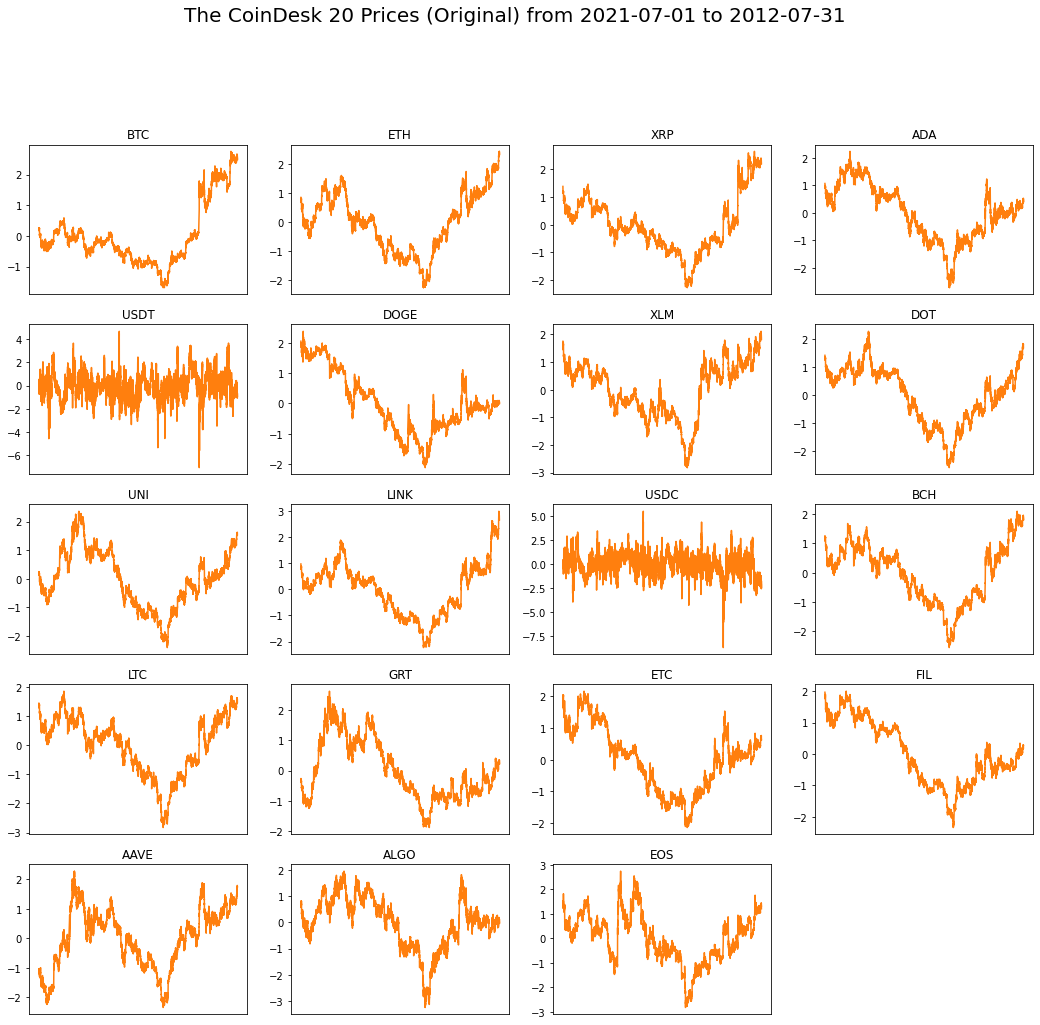

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,16))
fig.suptitle('The CoinDesk 20 Prices (Original) from 2021-07-01 to 2012-07-31' , fontsize=20, y = 1)
for i in range(len(coindesk20_list)):
    coin = coindesk20_list[i]
    plt.subplot(5, 4, i+1)
    plt.plot(cryptocurrency_df['Datetime'], cryptocurrency_df[coin], color = 'C1')
    plt.title(coin)
    #xticks empty to not see the dates
    plt.xticks([])
plt.show()

# Unscaled Data Max, Min values:

In [33]:
cryptocurrency_df.iloc[:, 1:].max() - cryptocurrency_df.iloc[:, 1:].min()

BTC     12899.613918
ETH       829.617877
XRP         0.251722
ADA         0.470905
USDT        0.003196
DOGE        0.100659
XLM         0.090597
DOT         7.263054
UNI         9.335053
LINK        9.934618
USDC        0.004293
BCH       171.950014
LTC        43.790019
GRT         0.322449
ETC        21.038717
FIL        20.418002
AAVE      133.768758
ALGO        0.262534
EOS         1.257880
dtype: float64

In [34]:
cryptocurrency_df.iloc[:, 1:].mean(), cryptocurrency_df.iloc[:, 1:].std()

(BTC     34236.462048
 ETH      2122.359495
 XRP         0.633269
 ADA         1.281294
 USDT        1.000224
 DOGE        0.207704
 XLM         0.250952
 DOT        14.261996
 UNI        18.758370
 LINK       17.644525
 USDC        1.000120
 BCH       479.321371
 LTC       130.590386
 GRT         0.610015
 ETC        48.274195
 FIL        51.135186
 AAVE      280.800079
 ALGO        0.841151
 EOS         3.794224
 dtype: float64,
 BTC     2902.937044
 ETH      176.911286
 XRP        0.051132
 ADA        0.094870
 USDT       0.000272
 DOGE       0.022343
 XLM        0.018368
 DOT        1.500380
 UNI        1.961839
 LINK       1.901725
 USDC       0.000303
 BCH       36.915653
 LTC        9.359463
 GRT        0.071270
 ETC        4.903763
 FIL        4.706772
 AAVE      28.972971
 ALGO       0.050543
 EOS        0.225796
 dtype: float64)

In [24]:
coindesk20_list

['BTC',
 'ETH',
 'XRP',
 'ADA',
 'USDT',
 'DOGE',
 'XLM',
 'DOT',
 'UNI',
 'LINK',
 'USDC',
 'BCH',
 'LTC',
 'GRT',
 'ETC',
 'FIL',
 'AAVE',
 'ALGO',
 'EOS']

# From the graphs, we have a trivial overview of The CoinDesk 20 cryptocurrencies such as their magnitudes and trends of unsacaled Data: 

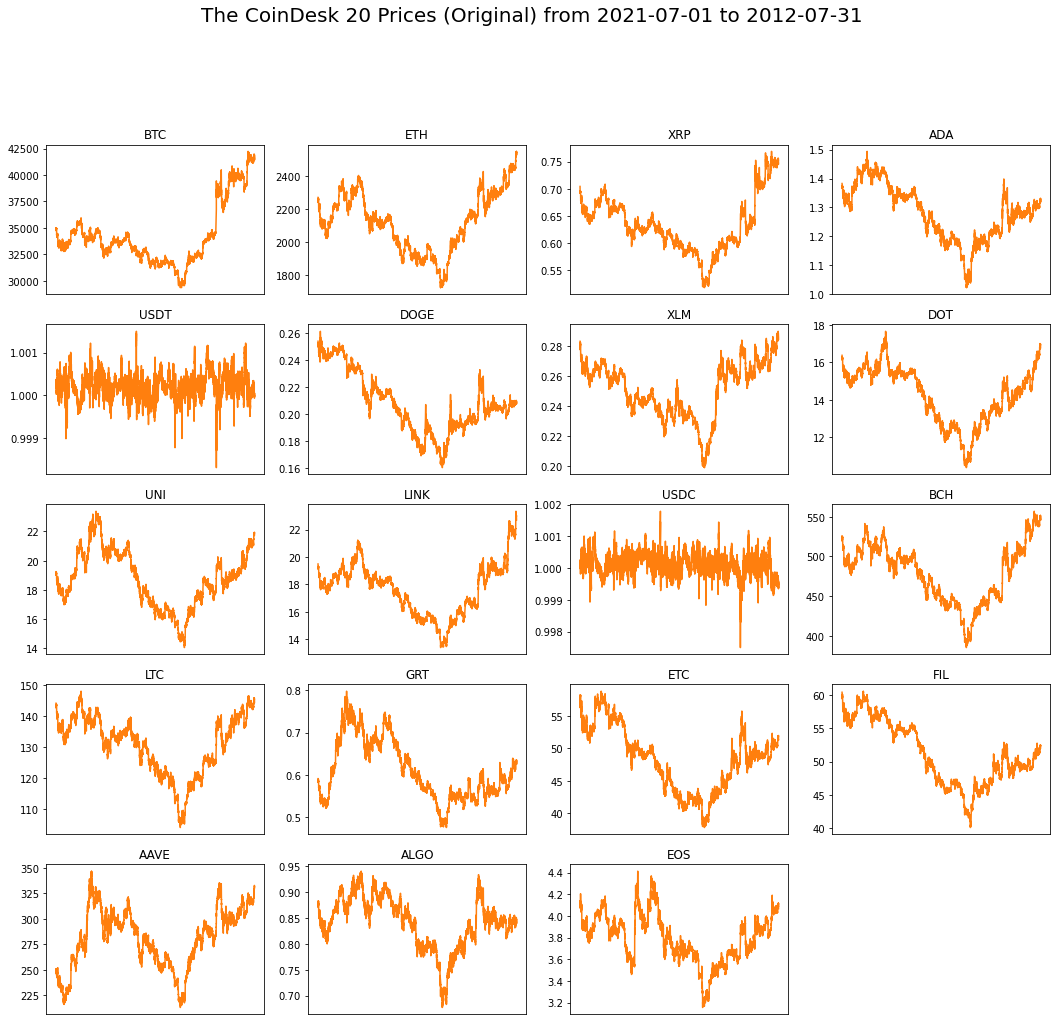

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,16))
fig.suptitle('The CoinDesk 20 Prices (Original) from 2021-07-01 to 2012-07-31' , fontsize=20, y = 1)
for i in range(len(coindesk20_list)):
    coin = coindesk20_list[i]
    plt.subplot(5, 4, i+1)
    plt.plot(cryptocurrency_df['Datetime'], cryptocurrency_df[coin], color = 'C1')
    plt.title(coin)
    #xticks empty to not see the dates
    plt.xticks([])
plt.show()

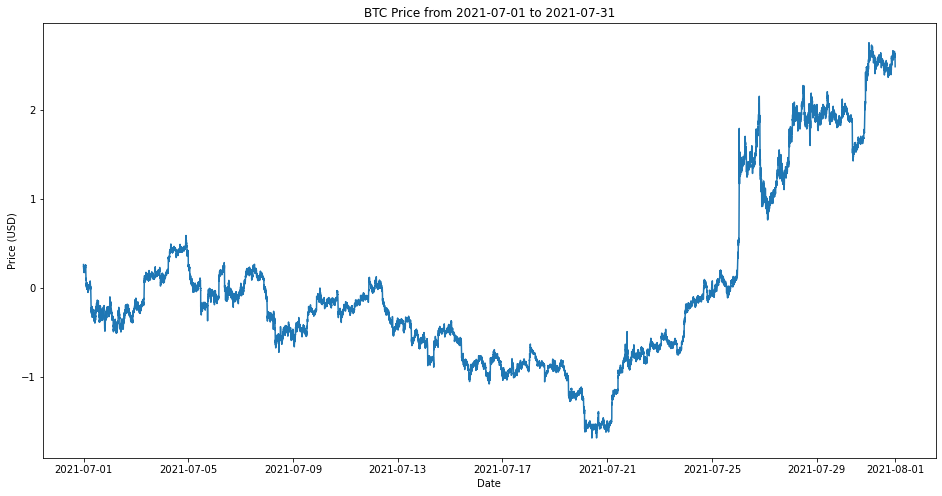

In [41]:
import matplotlib.pyplot as plt
coin = coindesk20_list[0]
plt.figure(figsize=(16,8))
plt.plot(cryptocurrency_df['Datetime'], cryptocurrency_df[coin])
plt.ylabel('Price (USD)')
plt.xlabel('Date')
#[:10]first ten characters. 
plt.title(coin + ' Price from ' + str(min(cryptocurrency_df['Datetime']))[:10] + ' to ' + str(max(cryptocurrency_df['Datetime']))[:10])

plt.show()

From the graphs, we have a trivial overview of The CoinDesk 20 cryptocurrencies such as their magnitudes and trends.

# Parameters
There are in total 3 parameters to be chosen and they are used to determine the following questions.

x_window: how much past pricing data will you use to predict the price?
time_shift: what is the time point you want to predict from the past data?
testing_window: how long do you want to test the model?

# In this tutorial, we will use 3-hour data to predict the next 1-minute price for 1 day as an example. (x_window: 180, time_shift = 1, testing_window: 1440)

In [45]:
testing_window = 1440      # 1 day, there are 1440 minutes in one day. 
x_window = 180             # 3 hours
time_shift = 1             # 1 minute

In [50]:
cryptocurrency_df.iloc[:, 1:]

BTC       ETH       XRP       ADA      USDT      DOGE       XLM  \
0      0.260957  0.840430  1.383791  1.070294  0.382417  2.057621  1.749280   
1      0.260017  0.823908  1.306542  1.036841  0.406563  2.042611  1.638031   
2      0.246645  0.815574  1.318867  1.016264  0.175671  2.024858  1.637247   
3      0.249815  0.800555  1.301462  1.012321  0.406485  2.023455  1.620201   
4      0.254960  0.813278  1.329311  1.033136  0.196723  2.030494  1.619799   
...         ...       ...       ...       ...       ...       ...       ...   
44635  2.552046  2.339396  2.233628  0.438514 -0.865130  0.026415  1.905033   
44636  2.572301  2.354879  2.266494  0.446039 -0.940359  0.037753  1.883337   
44637  2.570689  2.355571  2.257599  0.452685 -0.934600  0.036044  1.905269   
44638  2.534327  2.332013  2.233397  0.424786 -0.971276  0.021378  1.873115   
44639  2.484896  2.309398  2.204096  0.399391 -0.699584 -0.001884  1.820545   

            DOT       UNI      LINK      USDC       BCH       LTC       GRT  \
0      1.409473  0.247946  0.972763 -0.327461  1.259648  1.438366 -0.268979   
1      1.370197  0.184967  0.928693 -0.285098  1.219320  1.417706 -0.295044   
2      1.341148  0.171802  0.912289 -0.196931  1.181538  1.391786 -0.312195   
3      1.347444  0.187701  0.907967 -0.034058  1.189189  1.391061 -0.309580   
4      1.356942  0.198815  0.914622 -0.451754  1.204436  1.387744 -0.298255   
...         ...       ...       ...       ...       ...       ...       ...   
44635  1.723482  1.556040  2.680521 -2.394977  1.845733  1.533883  0.250856   
44636  1.753741  1.571020  2.705876 -2.467223  1.869453  1.545609  0.258628   
44637  1.750304  1.572257  2.715127 -2.482200  1.858762  1.544391  0.262720   
44638  1.712302  1.549728  2.680130 -2.278817  1.838007  1.516847  0.228272   
44639  1.678031  1.534461  2.661212 -2.068795  1.804896  1.466646  0.216529   

            ETC       FIL      AAVE      ALGO       EOS  
0      1.878498  1.963332 -1.037415  0.803776  1.520228  
1      1.786059  1.900571 -1.072885  0.787449  1.432364  
2      1.754805  1.865775 -1.077161  0.766213  1.402518  
3      1.768453  1.870418 -1.066130  0.772987  1.406351  
4      1.738702  1.873834 -1.054988  0.783841  1.418216  
...         ...       ...       ...       ...       ...  
44635  0.623686  0.227418  1.733309  0.008410  1.300389  
44636  0.642266  0.237700  1.737933  0.022472  1.317569  
44637  0.654127  0.235860  1.744246  0.013986  1.326999  
44638  0.628557  0.220824  1.724999 -0.004097  1.290218  
44639  0.624000  0.187728  1.736648 -0.041404  1.206148  

[44640 rows x 19 columns]

In [51]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples

In [69]:
cryptocurrency_df_BTC = cryptocurrency_df.iloc[:, 1]

In [70]:
cryptocurrency_df_BTC.shape

(44640,)

In [65]:
from sklearn.preprocessing import MinMaxScaler # for feature scaling

In [73]:
import numpy as np

In [74]:
X= np.array(cryptocurrency_df_BTC)

In [75]:
#Select data for modeling and apply MinMax scaling
X= np.array(cryptocurrency_df_BTC)
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X.reshape(-1, 1))

In [76]:
#Create training and testing samples
train_data, test_data = train_test_split(X_scaled, test_size=0.2, shuffle=False)

In [77]:
train_data.shape, test_data.shape

((35712, 1), (8928, 1))

In [78]:
35712 + 8928

44640

In [80]:
#We will use this function in the next step to get the data into the right shape
def prep_data(datain, time_step):
    # 1. y-array  
    # First, create an array with indices for y elements based on the chosen time_step
    y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)
    # Create y array based on the above indices 
    y_values = datain[y_indices]
    
    # 2. X-array  
    # We want to have the same number of rows for X as we do for y
    rows_X = len(y_values)
    # Since the last element in y_tmp may not be the last element of the datain, 
    # let's ensure that X array stops with the last y
    X_values = datain[range(time_step*rows_X)]
    # Now take this array and reshape it into the desired shape
    X_values = np.reshape(X_values, (rows_X, time_step, 1))
    return X_values, y_values

In [81]:
time_step = 180   #3 hours to predict the next minute. 

# let's break down some steps of the function: 

In [82]:
y_indices =  np.arange(start=time_step, stop=len(train_data), step=time_step)

In [83]:
y_indices

array([  180,   360,   540,   720,   900,  1080,  1260,  1440,  1620,
        1800,  1980,  2160,  2340,  2520,  2700,  2880,  3060,  3240,
        3420,  3600,  3780,  3960,  4140,  4320,  4500,  4680,  4860,
        5040,  5220,  5400,  5580,  5760,  5940,  6120,  6300,  6480,
        6660,  6840,  7020,  7200,  7380,  7560,  7740,  7920,  8100,
        8280,  8460,  8640,  8820,  9000,  9180,  9360,  9540,  9720,
        9900, 10080, 10260, 10440, 10620, 10800, 10980, 11160, 11340,
       11520, 11700, 11880, 12060, 12240, 12420, 12600, 12780, 12960,
       13140, 13320, 13500, 13680, 13860, 14040, 14220, 14400, 14580,
       14760, 14940, 15120, 15300, 15480, 15660, 15840, 16020, 16200,
       16380, 16560, 16740, 16920, 17100, 17280, 17460, 17640, 17820,
       18000, 18180, 18360, 18540, 18720, 18900, 19080, 19260, 19440,
       19620, 19800, 19980, 20160, 20340, 20520, 20700, 20880, 21060,
       21240, 21420, 21600, 21780, 21960, 22140, 22320, 22500, 22680,
       22860, 23040,

In [84]:
#since the last values do not raech the time_steps of 180 are not going be used for training. 
35712 - 35640

72

In [85]:
#these are the values every 180 minutes (3 hours) 
y_targets = train_data[y_indices]
y_targets

array([[0.38931602],
       [0.39110991],
       [0.32083902],
       [0.3361797 ],
       [0.30446208],
       [0.31895015],
       [0.3221194 ],
       [0.32553897],
       [0.30416989],
       [0.27712894],
       [0.31014041],
       [0.28706284],
       [0.33690747],
       [0.31569903],
       [0.29483244],
       [0.34847176],
       [0.32458344],
       [0.33925186],
       [0.4029088 ],
       [0.40702478],
       [0.41520336],
       [0.42089232],
       [0.41707692],
       [0.40967349],
       [0.40577758],
       [0.45505203],
       [0.48053294],
       [0.47704861],
       [0.47477695],
       [0.477178  ],
       [0.4816337 ],
       [0.44790354],
       [0.38970575],
       [0.38934088],
       [0.38498673],
       [0.31777241],
       [0.33905585],
       [0.35749173],
       [0.35485769],
       [0.33715681],
       [0.35366368],
       [0.42309493],
       [0.43769153],
       [0.35259451],
       [0.36745901],
       [0.35531962],
       [0.35421629],
       [0.375

In [86]:
#every 180 minutes we have a total of 198 values. 
y_targets.shape

(198, 1)

In [87]:
# We want to have the same number of rows for X as we do for y
rows_X = len(y_targets)

In [88]:
X_values = train_data[range(time_step*rows_X)]

In [89]:
X_values.shape

(35640, 1)

In [90]:
# Now take this array and reshape it into the desired shape
X_values = np.reshape(X_values, (rows_X, time_step, 1))

In [91]:
#we have 198 samples of 180 values for one cryptocurrency.BTC. 
X_values.shape

(198, 180, 1)

In [92]:
#first sample
X_values[0].shape

(180, 1)

In [93]:
X_train, y_train = prep_data(train_data, time_step)
X_test, y_test = prep_data(test_data, time_step)

In [94]:
X_train.shape, y_train.shape

((198, 180, 1), (198, 1))

# Output Layer uses activation linear because it is a reggression model, continuos data. An every 180 values (input data) we predict the 181 minute value for this cryptocurrency. One sequence of 180 values input at a time, predicting one output.

# ---------------------------------------------------------------------------------------------------------------

In [95]:
#Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, SimpleRNN # for creating regular densely-connected NN layers and RNN layers

import math # to help with data reshaping of the data

# Sklearn
import sklearn # for model evaluation
from sklearn.metrics import mean_squared_error # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.7.0
plotly: 4.14.3


# Specify the structure of a Neural Network

In [96]:
model = Sequential(name="First-RNN-Model") # Model
model.add(Input(shape=(time_step,1), name='Input-Layer')) # Input Layer - need to specify the shape of inputs
model.add(SimpleRNN(units=10, activation='tanh', name='Hidden-Recurrent-Layer')) # Hidden Recurrent Layer, Tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))
model.add(Dense(units=5, activation='tanh', name='Hidden-Layer')) # Hidden Layer, Tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))
model.add(Dense(units=1, activation='linear', name='Output-Layer')) # Output Layer, Linear(x) = x

# Compile keras model

In [97]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# Fit keras model on the dataset

In [110]:
model.fit(X_train, # input data
          y_train, # target data
          batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )


Epoch 1/100
158/158 [==============================] - 5s 29ms/step - loss: 6.1058e-05 - mean_squared_error: 6.1058e-05 - mean_absolute_error: 0.0060 - val_loss: 4.5498e-05 - val_mean_squared_error: 4.5498e-05 - val_mean_absolute_error: 0.0053
Epoch 2/100
158/158 [==============================] - 4s 27ms/step - loss: 6.1233e-05 - mean_squared_error: 6.1233e-05 - mean_absolute_error: 0.0060 - val_loss: 1.0565e-05 - val_mean_squared_error: 1.0565e-05 - val_mean_absolute_error: 0.0023
Epoch 3/100
158/158 [==============================] - 4s 27ms/step - loss: 4.4140e-05 - mean_squared_error: 4.4140e-05 - mean_absolute_error: 0.0051 - val_loss: 3.7767e-05 - val_mean_squared_error: 3.7767e-05 - val_mean_absolute_error: 0.0048
Epoch 4/100
158/158 [==============================] - 4s 26ms/step - loss: 4.3867e-05 - mean_squared_error: 4.3867e-05 - mean_absolute_error: 0.0051 - val_loss: 4.5193e-05 - val_mean_squared_error: 4.5193e-05 - val_mean_absolute_error: 0.0055
Epoch 5/100
158/158 [===

Epoch 34/100
158/158 [==============================] - 4s 25ms/step - loss: 3.9794e-05 - mean_squared_error: 3.9794e-05 - mean_absolute_error: 0.0050 - val_loss: 1.4703e-05 - val_mean_squared_error: 1.4703e-05 - val_mean_absolute_error: 0.0031
Epoch 35/100
158/158 [==============================] - 4s 25ms/step - loss: 3.6574e-05 - mean_squared_error: 3.6574e-05 - mean_absolute_error: 0.0048 - val_loss: 3.6009e-05 - val_mean_squared_error: 3.6009e-05 - val_mean_absolute_error: 0.0054
Epoch 36/100
158/158 [==============================] - 4s 27ms/step - loss: 3.5627e-05 - mean_squared_error: 3.5627e-05 - mean_absolute_error: 0.0049 - val_loss: 8.6795e-05 - val_mean_squared_error: 8.6795e-05 - val_mean_absolute_error: 0.0089
Epoch 37/100
158/158 [==============================] - 4s 28ms/step - loss: 2.1092e-05 - mean_squared_error: 2.1092e-05 - mean_absolute_error: 0.0036 - val_loss: 7.9570e-06 - val_mean_squared_error: 7.9570e-06 - val_mean_absolute_error: 0.0022
Epoch 38/100
158/158

158/158 [==============================] - 7s 42ms/step - loss: 1.9220e-05 - mean_squared_error: 1.9220e-05 - mean_absolute_error: 0.0033 - val_loss: 5.5816e-06 - val_mean_squared_error: 5.5816e-06 - val_mean_absolute_error: 0.0019


# Use model to make predictions

In [111]:
# Predict the result on training data
pred_train = model.predict(X_train)
# Predict the result on test data
pred_test = model.predict(X_test)

In [112]:
pred_train.shape, y_train.shape

((198, 1), (198, 1))

In [113]:
pred_test.shape, y_test.shape

((49, 1), (49, 1))

In [114]:
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")


-------------------- Model Summary --------------------
Model: "First-RNN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Recurrent-Layer (Sim  (None, 10)               120       
 pleRNN)                                                         
                                                                 
 Hidden-Layer (Dense)        (None, 5)                 55        
                                                                 
 Output-Layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________



Explanation:

num_units = equals the number of units in the RNN

num_features = equals the number features of your input

Now you have two things happening in your RNN.

First you have the recurrent loop, where the state is fed recurrently into the model to generate the next step. Weights for the recurrent step are:

recurrent_weights = num_units*num_units

The secondly you have new input of your sequence at each step.

input_weights = num_features*num_units

So now we have the weights, whats missing are the biases - for every unit one bias:

biases = num_units*1

Hidden-Layer (Dense) = 10 * 5 = 50 weights + 5 biases = 55 params

Output-Layer (Dense) = 5 * 1 = 5 weights + 1 biases = 6 params.

In [115]:
print('-------------------- Weights and Biases --------------------')
print("Note, the last parameter in each layer is bias while the rest are weights")
print("")
for layer in model.layers:
    print(layer.name)
    for item in layer.get_weights():
        print("  ", item)

-------------------- Weights and Biases --------------------
Note, the last parameter in each layer is bias while the rest are weights

Hidden-Recurrent-Layer
   [[-0.17930053 -0.18281458 -0.29818398 -0.1039474   0.30066726 -0.7611005
   0.4863752   0.0280453   0.5115772   0.3933769 ]]
   [[ 0.26056594  0.25272146 -0.05646013 -0.48285666 -0.5777755   0.56439495
   0.24033163  0.18594189 -0.17277777 -0.08560439]
 [ 0.25388813 -0.34251168  0.08044606 -0.4552918  -0.04063423 -0.4193129
   0.16118176 -0.3979189  -0.42184028 -0.30227715]
 [-0.00267854  0.32792008 -0.08087432 -0.3900113   0.23588043 -0.20171832
  -0.2564868   0.564238   -0.07129852 -0.06422374]
 [-0.0622307   0.14370643 -0.74216026  0.02334765  0.26996922 -0.14454374
   0.33184865 -0.11258338  0.32394218 -0.12456725]
 [-0.51319444  0.30749467 -0.29574072 -0.05449171 -0.27849492 -0.54805815
   0.05739447 -0.16234381 -0.06927859  0.2721977 ]
 [-0.38790038 -0.01925663 -0.37159526 -0.10747969  0.15524942  0.26437163
  -0.2620575

# At the end are the final weights after the compiling was done that minimize the loss. Updating the biases in backpropagation is similar to updating the weights.¶

In [116]:
print("")
print('---------- Evaluation on Training Data ----------')
print("MSE: ", mean_squared_error(y_train, pred_train))
print("")


---------- Evaluation on Training Data ----------
MSE:  1.0239117222211743e-05



In [117]:
print('---------- Evaluation on Test Data ----------')
print("MSE: ", mean_squared_error(y_test, pred_test))
print("")

---------- Evaluation on Test Data ----------
MSE:  0.004387492051039937



Let’s now plot the results on a chart and compare actual and predicted values. Note, we use the inverse_transform function to convert targets and predictions from scaled (we used MinMaxScaler before training RNN) to the original value range.

In [118]:
#97 days to check the median temperature. 
print(len(y_test))
print(len(pred_test))

49
49


In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(range(0,len(y_test))),
                         y=scaler.inverse_transform(y_test).flatten(),
                         mode='lines',
                         name='Median Temperature - Actual (Test)',
                         opacity=0.8,
                         line=dict(color='black', width=1)
                        ))
fig.add_trace(go.Scatter(x=np.array(range(0,len(pred_test))),
                         y=scaler.inverse_transform(pred_test).flatten(),
                         mode='lines',
                         name='Median Temperature - Predicted (Test)',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Obesrvtions every 180 minutes (3hours)'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Values'
                )

# Set figure title
fig.update_layout(title=dict(text="Minutes values of BTC cryptocurrency", 
                             font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )

fig.show()

# Predictions are really close to the actual values on the testing data. Follow the same trend. 

# ---------------------------------------------------------------------------------------------------------------

# The above results are for the test dataset. The prediction looks pretty accurate, but remember that we take 180 prior data points in each case and only predict the next one. 

# You will recall that we have every 181st observation in a sequence as our target during the training and prediction of the above model. But what if we want to use the model to generate predictions for every minute for this cryptocurrency. The following code does exactly that:¶

# Below is the way how we can make a prediction for every minute in the data instead of every 180 minutes. 

In [122]:
X_every= cryptocurrency_df[['BTC']]

In [123]:
X_every

BTC
0      34993.994267
1      34991.266464
2      34952.450112
3      34961.649826
4      34976.586395
...             ...
44635  41644.809117
44636  41703.605552
44637  41698.926409
44638  41593.370275
44639  41449.876911

[44640 rows x 1 columns]

In [124]:
X_every=scaler.transform(X_every)
X_every

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



array([[0.43881198],
       [0.43860052],
       [0.43559141],
       ...,
       [0.95858972],
       [0.95040683],
       [0.93928298]])

In [125]:
X_every.shape

(44640, 1)

In [126]:
len(X_every)-time_step #180 minutes. 

44460

In [128]:
for i in range(0, len(X_every)-time_step):
    if i==0:
        #the first seven values do not have predictions. 
        X_comb=X_every[i:i+time_step]
    else: 
        X_comb=np.append(X_comb, X_every[i:i+time_step])
X_comb=np.reshape(X_comb, (math.floor(len(X_comb)/time_step), time_step, 1))
print(X_comb.shape)

(44460, 180, 1)


# We have 44460 samples of 180 values each for one cryptocurrency. 

In [130]:
X_comb[0].shape. 180 values for the first sample. 

(180, 1)

In [131]:
cryptocurrency_df.head()

Datetime           BTC          ETH       XRP       ADA  \
0 2021-07-01 00:00:00  34993.994267  2271.039330  0.704025  1.382831   
1 2021-07-01 00:01:00  34991.266464  2268.116536  0.700075  1.379658   
2 2021-07-01 00:02:00  34952.450112  2266.642162  0.700705  1.377706   
3 2021-07-01 00:03:00  34961.649826  2263.985129  0.699815  1.377332   
4 2021-07-01 00:04:00  34976.586395  2266.235855  0.701239  1.379306   

       USDT      DOGE       XLM        DOT        UNI       LINK      USDC  \
0  1.000329  0.253676  0.283083  16.376717  19.244795  19.494431  1.000021   
1  1.000335  0.253341  0.281040  16.317789  19.121242  19.410625  1.000034   
2  1.000272  0.252944  0.281025  16.274206  19.095415  19.379428  1.000061   
3  1.000335  0.252913  0.280712  16.283652  19.126605  19.371209  1.000110   
4  1.000278  0.253070  0.280705  16.297902  19.148409  19.383866  0.999984   

          BCH         LTC       GRT        ETC        FIL        AAVE  \
0  525.821572  144.052565  0.590845  57.485801  60.376036  250.743422   
1  524.332870  143.859204  0.588987  57.032506  60.080642  249.715773   
2  522.938129  143.616612  0.587765  56.879247  59.916865  249.591864   
3  523.220566  143.609822  0.587951  56.946175  59.938719  249.911473   
4  523.783413  143.578780  0.588758  56.800281  59.954795  250.234278   

       ALGO       EOS  
0  0.881776  4.137482  
1  0.880951  4.117643  
2  0.879877  4.110904  
3  0.880220  4.111769  
4  0.880768  4.114448

In [132]:
# Use the reshaped data to make predictions and add back into the dataframe
# np.zeros(time_step) - Set the first 7 numbers to 0 as we do not have data to predict
cryptocurrency_df['BTC_Prediction_Values'] = np.append(np.zeros(time_step), scaler.inverse_transform(model.predict(X_comb)))

In [134]:
cryptocurrency_df.head(10)

Datetime           BTC          ETH       XRP       ADA  \
0 2021-07-01 00:00:00  34993.994267  2271.039330  0.704025  1.382831   
1 2021-07-01 00:01:00  34991.266464  2268.116536  0.700075  1.379658   
2 2021-07-01 00:02:00  34952.450112  2266.642162  0.700705  1.377706   
3 2021-07-01 00:03:00  34961.649826  2263.985129  0.699815  1.377332   
4 2021-07-01 00:04:00  34976.586395  2266.235855  0.701239  1.379306   
5 2021-07-01 00:05:00  34903.866572  2258.891675  0.698550  1.375326   
6 2021-07-01 00:06:00  34907.650630  2258.048348  0.697376  1.373575   
7 2021-07-01 00:07:00  34932.393499  2260.809295  0.698678  1.373974   
8 2021-07-01 00:08:00  34957.666627  2261.956715  0.698365  1.375013   
9 2021-07-01 00:09:00  34854.859764  2253.511770  0.696636  1.371327   

       USDT      DOGE       XLM        DOT        UNI  ...      USDC  \
0  1.000329  0.253676  0.283083  16.376717  19.244795  ...  1.000021   
1  1.000335  0.253341  0.281040  16.317789  19.121242  ...  1.000034   
2  1.000272  0.252944  0.281025  16.274206  19.095415  ...  1.000061   
3  1.000335  0.252913  0.280712  16.283652  19.126605  ...  1.000110   
4  1.000278  0.253070  0.280705  16.297902  19.148409  ...  0.999984   
5  1.000299  0.252695  0.279889  16.229684  19.104342  ...  0.999998   
6  1.000298  0.252305  0.279079  16.226008  19.085655  ...  1.000072   
7  1.000270  0.252307  0.279352  16.244279  19.094075  ...  1.000119   
8  1.000277  0.252390  0.279439  16.266209  19.123901  ...  0.999992   
9  1.000369  0.251220  0.278068  16.175621  19.069316  ...  1.000153   

          BCH         LTC       GRT        ETC        FIL        AAVE  \
0  525.821572  144.052565  0.590845  57.485801  60.376036  250.743422   
1  524.332870  143.859204  0.588987  57.032506  60.080642  249.715773   
2  522.938129  143.616612  0.587765  56.879247  59.916865  249.591864   
3  523.220566  143.609822  0.587951  56.946175  59.938719  249.911473   
4  523.783413  143.578780  0.588758  56.800281  59.954795  250.234278   
5  522.376660  143.280481  0.586617  56.609787  59.761337  249.306252   
6  521.685418  142.982141  0.584790  56.583837  59.660128  248.831593   
7  522.105818  143.105359  0.586717  56.652769  59.633518  249.666562   
8  522.608871  143.199783  0.586035  56.731767  59.673386  249.748055   
9  521.030656  142.744812  0.583484  56.294831  59.564896  248.304640   

       ALGO       EOS  BTC_Prediction_Values  
0  0.881776  4.137482                    0.0  
1  0.880951  4.117643                    0.0  
2  0.879877  4.110904                    0.0  
3  0.880220  4.111769                    0.0  
4  0.880768  4.114448                    0.0  
5  0.878735  4.102530                    0.0  
6  0.876758  4.077151                    0.0  
7  0.878193  4.088652                    0.0  
8  0.877977  4.095080                    0.0  
9  0.874340  4.078464                    0.0  

[10 rows x 21 columns]

# We can see that for the first 180 values per minute we do not have predicitons because the sequence length is exactly that lenght. Afterwards we have predictions per minute and not every 180 values. 

In [140]:
cryptocurrency_df.iloc[0:180,20].value_counts()

0.0    180
Name: BTC_Prediction_Values, dtype: int64

# Below is the first prediction: 

In [142]:
cryptocurrency_df.iloc[181,20]

34314.17578125

In [143]:
cryptocurrency_df_BTC = cryptocurrency_df[['Datetime','BTC','BTC_Prediction_Values']]

In [144]:
cryptocurrency_df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datetime               44640 non-null  datetime64[ns]
 1   BTC                    44640 non-null  float64       
 2   BTC_Prediction_Values  44640 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.0 MB


In [147]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cryptocurrency_df_BTC['Datetime'],
                         y=cryptocurrency_df_BTC['BTC'],
                         mode='lines',
                         name='Values per Minute - Actual',
                         opacity=0.8,
                         line=dict(color='black', width=1)
                        ))
fig.add_trace(go.Scatter(x= cryptocurrency_df_BTC['Datetime'],
                         y= cryptocurrency_df_BTC['BTC_Prediction_Values'],
                         mode='lines',
                         name='Values per Minute - Predicted',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Observations per minute'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Values'
                )

# Set figure title
fig.update_layout(title=dict(text="Values per minute BTC cryptocurrency", 
                             font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )

fig.show()
#black is the actual median day and predicted are with color red. 

# The predictions and actuals are very closed, meaning that the model is doing a great job! 